# Burnout en empleados corporativos
## Aprendizaje de Máquina - TP FINAL

---
## Desarrollo del modelo Support Vector Machine (SVM)
---

#### Carga de datos

In [29]:
#importar librerias
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np


In [30]:
# Cargar de los datasets
X_train = pd.read_csv("output/burnout_X_train.csv")
y_train = pd.read_csv("output/burnout_y_train.csv")
X_test = pd.read_csv("output/burnout_X_test.csv")
y_test = pd.read_csv("output/burnout_y_test.csv")

In [31]:
#check unique values in y_train
print(y_train['BurnRate_Class'].unique())

[1. 0. 2.]


In [32]:
#Escalado de features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

/Users/martin/CEIA/MLI/CEIA-ML-TPFINAL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Classification Report:

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      1136
         1.0       0.87      0.91      0.89      2514
         2.0       0.82      0.70      0.76       637

    accuracy                           0.87      4287
   macro avg       0.86      0.83      0.84      4287
weighted avg       0.87      0.87      0.87      4287

F1 Score (macro): 0.8422


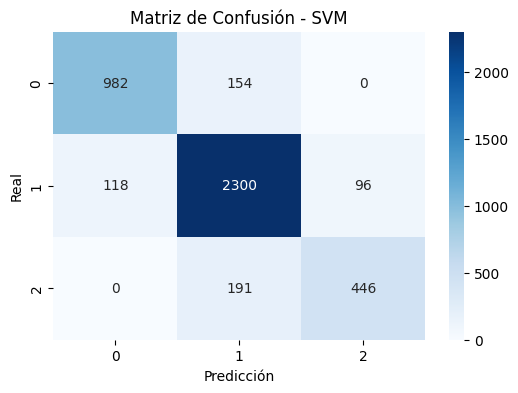

In [34]:

y_pred = svm_model.predict(X_test_scaled)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# F1 Score (macro para evitar sesgo si está desbalanceado)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (macro): {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - SVM")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [35]:
# Reentrenar modelo con probability=True
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Entrenar
clf.fit(X_train_scaled, y_train['BurnRate_Class'])

# Obtener probabilidades
y_score = clf.predict_proba(X_test_scaled)

# Binarizar las etiquetas reales
classes = np.sort(y_train['BurnRate_Class'].unique())
y_test_binarized = label_binarize(y_test['BurnRate_Class'], classes=classes)

# ROC Curve por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

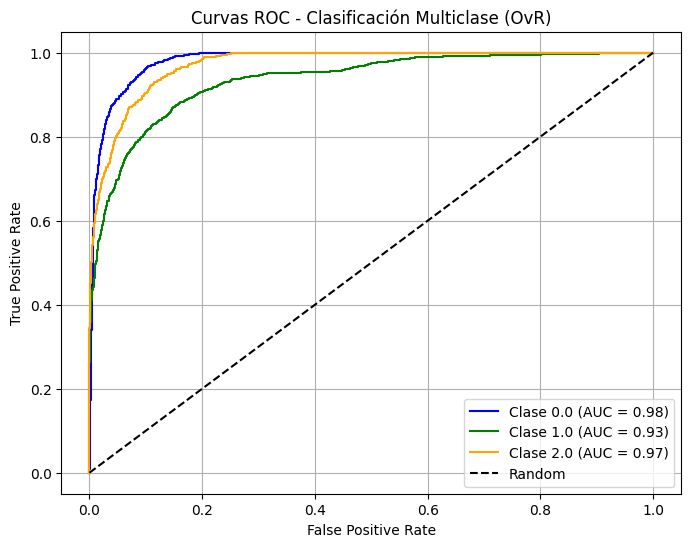

In [36]:
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'orange']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC - Clasificación Multiclase (OvR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
